In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ---------- Step 1: Load and preview data ----------
df = pd.read_csv("Ecommerce recommender using Support Vector Machine.csv")

# Look at first 5 rows
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
   Unnamed: 0 User_ID  Age  Gender  Location  Income   Interests  \
0           0      #1   56    Male  Suburban   38037      Sports   
1           1      #2   46  Female     Rural  103986  Technology   
2           2      #3   32  Female  Suburban  101942      Sports   
3           3      #4   60  Female  Suburban   71612     Fashion   
4           4      #5   25    Male  Suburban   49725      Travel   

   Last_Login_Days_Ago  Purchase_Frequency  Average_Order_Value  \
0                    5                   7                   18   
1                   15                   7                  118   
2                   28                   1                  146   
3                   18                   3                  163   
4                    2                   5                  141   

   Total_Spending Product_Category_Preference  Time_Spent_on_Site_Minutes  \
0            2546                       Books                         584   
1           

In [3]:
# ---------- Step 2: Basic information ----------
print("\nShape of dataset (rows, columns):", df.shape)
print("\nInfo about dataset:")
print(df.info())
# 1). RangeIndex  , entries
#2).  Column   ,   Non-Null Count  ,  Dtype 
#3). dtypes
#4). memory usage
#5). Missing Values


Shape of dataset (rows, columns): (1000, 15)

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1000 non-null   int64 
 1   User_ID                      1000 non-null   object
 2   Age                          1000 non-null   int64 
 3   Gender                       1000 non-null   object
 4   Location                     1000 non-null   object
 5   Income                       1000 non-null   int64 
 6   Interests                    1000 non-null   object
 7   Last_Login_Days_Ago          1000 non-null   int64 
 8   Purchase_Frequency           1000 non-null   int64 
 9   Average_Order_Value          1000 non-null   int64 
 10  Total_Spending               1000 non-null   int64 
 11  Product_Category_Preference  1000 non-null   object
 12  Time_Spent_on_Site_Minut

In [4]:
# ---------- Step 3: Summary statistics ----------
print("\nSummary statistics (numeric columns):")
print(df.describe())


Summary statistics (numeric columns):
        Unnamed: 0          Age         Income  Last_Login_Days_Ago  \
count  1000.000000  1000.000000    1000.000000          1000.000000   
mean    499.500000    40.986000   81304.732000            15.586000   
std     288.819436    13.497852   37363.972753             8.205604   
min       0.000000    18.000000   20155.000000             1.000000   
25%     249.750000    29.000000   48715.500000             8.000000   
50%     499.500000    42.000000   81042.000000            16.000000   
75%     749.250000    52.000000  112694.500000            23.000000   
max     999.000000    64.000000  149951.000000            29.000000   

       Purchase_Frequency  Average_Order_Value  Total_Spending  \
count         1000.000000          1000.000000     1000.000000   
mean             4.631000           104.039000     2552.957000   
std              2.837762            54.873569     1420.985048   
min              0.000000            10.000000      112.0

In [5]:
# ---------- Step 4: Check for missing values ----------
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0                     0
User_ID                        0
Age                            0
Gender                         0
Location                       0
Income                         0
Interests                      0
Last_Login_Days_Ago            0
Purchase_Frequency             0
Average_Order_Value            0
Total_Spending                 0
Product_Category_Preference    0
Time_Spent_on_Site_Minutes     0
Pages_Viewed                   0
Newsletter_Subscription        0
dtype: int64


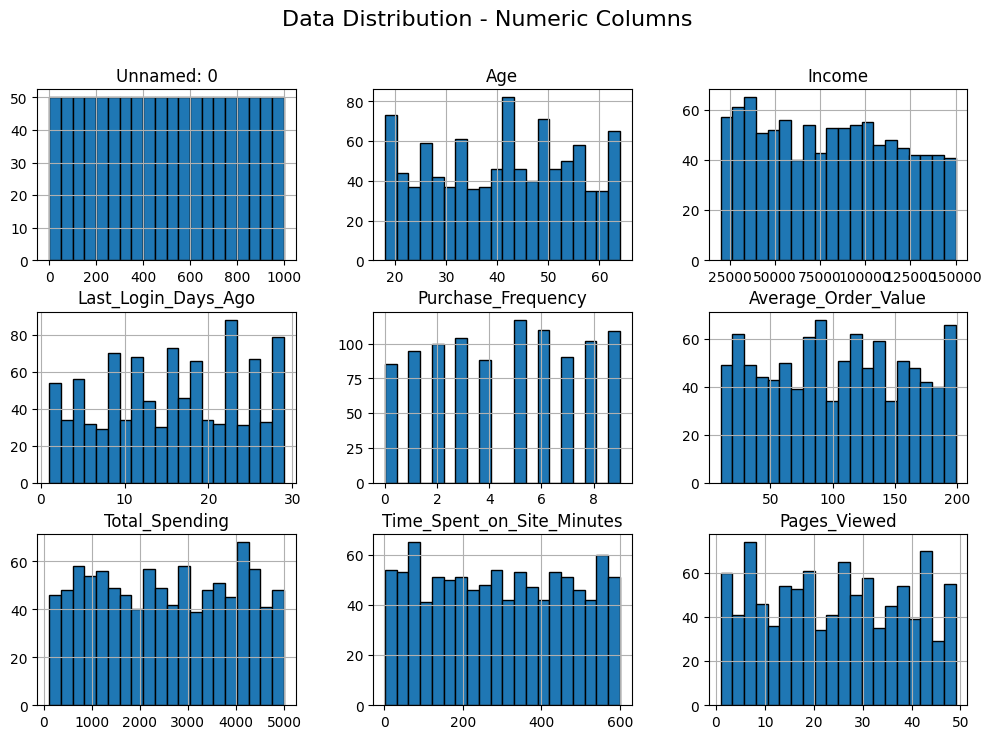

In [6]:
# ---------- Step 5: Data Distribution ----------
import matplotlib.pyplot as plt

# Create histograms for all numeric columns
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Data Distribution - Numeric Columns", fontsize=16)
plt.show()


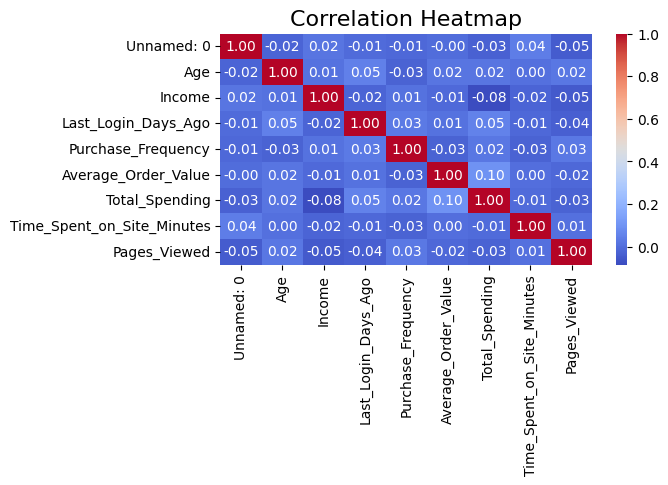

In [12]:
# ---------- Step 6: Correlation Heatmap ----------
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(6, 3))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


Gender counts:
Gender
Male      526
Female    474
Name: count, dtype: int64

Location counts:
Location
Suburban    349
Urban       344
Rural       307
Name: count, dtype: int64

Interests counts:
Interests
Sports        213
Fashion       209
Travel        196
Food          196
Technology    186
Name: count, dtype: int64

Product Category Preference:
Product_Category_Preference
Apparel            218
Electronics        209
Books              198
Home & Kitchen     189
Health & Beauty    186
Name: count, dtype: int64

Newsletter Subscription:
Newsletter_Subscription
True     507
False    493
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_45372\2447869281.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_45372\2447869281.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Newsletter_Subscription", data=df, palette="Set1")


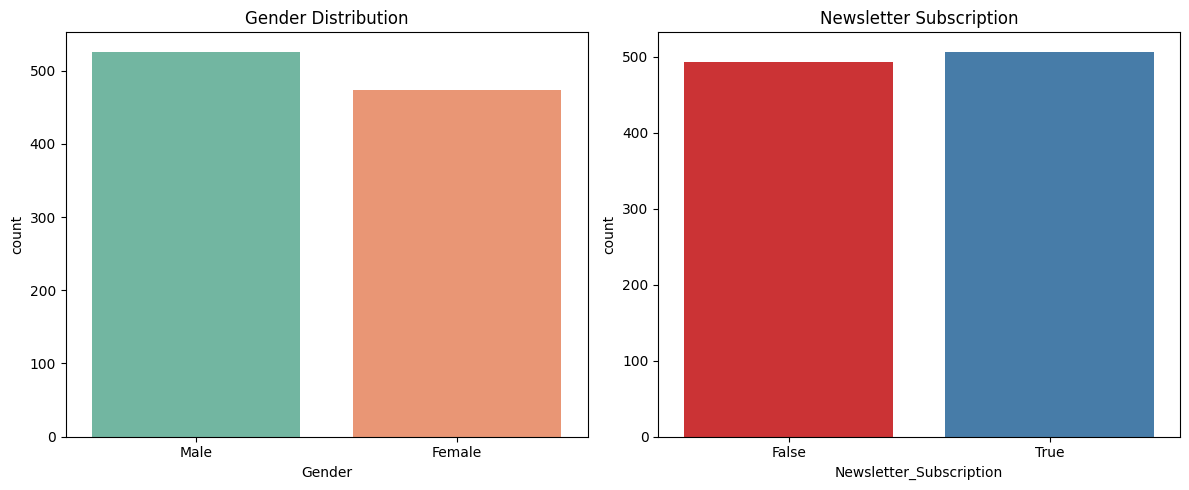

In [8]:
# ---------- Step 7: Categorical Data Analysis ----------

# Example: Gender distribution
print("Gender counts:")
print(df["Gender"].value_counts())

# Example: Location distribution
print("\nLocation counts:")
print(df["Location"].value_counts())

# Example: Interests distribution
print("\nInterests counts:")
print(df["Interests"].value_counts())

# Example: Product category preference
print("\nProduct Category Preference:")
print(df["Product_Category_Preference"].value_counts())

# Example: Newsletter subscription
print("\nNewsletter Subscription:")
print(df["Newsletter_Subscription"].value_counts())

# -------- Bar Plots --------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Gender
plt.subplot(1, 2, 1)
sns.countplot(x="Gender", data=df, palette="Set2")
plt.title("Gender Distribution")

# Newsletter Subscription
plt.subplot(1, 2, 2)
sns.countplot(x="Newsletter_Subscription", data=df, palette="Set1")
plt.title("Newsletter Subscription")

plt.tight_layout()
plt.show()


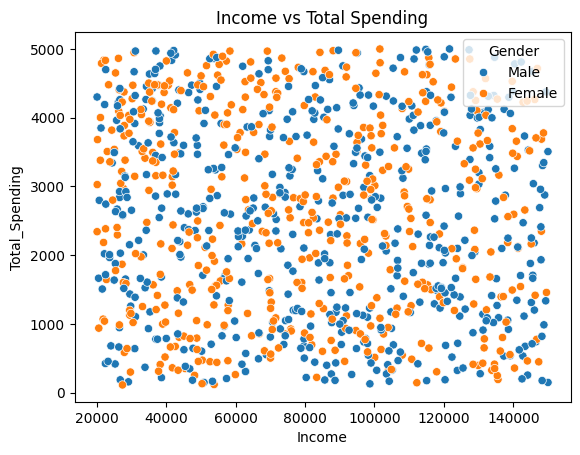

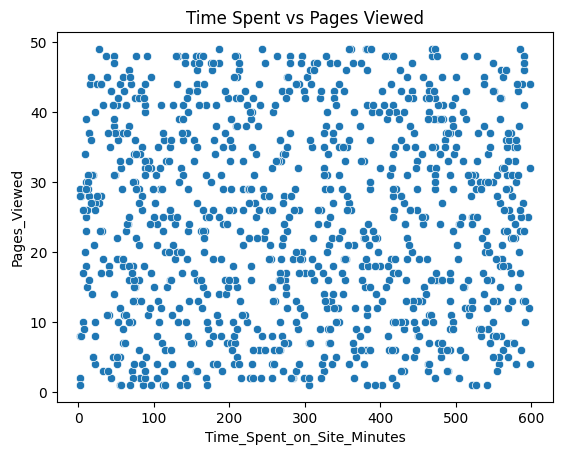

C:\Users\HP\AppData\Local\Temp\ipykernel_45372\2952197977.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Product_Category_Preference", y="Total_Spending", data=df, estimator="mean", ci=None)


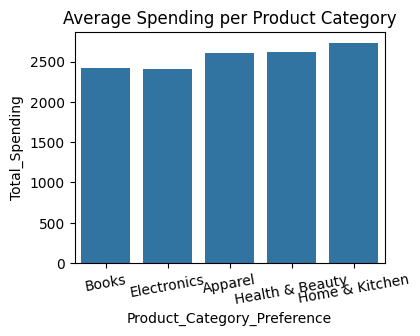

In [10]:
# ---------- Step 8: Feature Insights ----------

import seaborn as sns
import matplotlib.pyplot as plt

# Relationship between Income and Total Spending
sns.scatterplot(x="Income", y="Total_Spending", data=df, hue="Gender")
plt.title("Income vs Total Spending")
plt.show()

# Relationship between Time Spent on Site and Pages Viewed
sns.scatterplot(x="Time_Spent_on_Site_Minutes", y="Pages_Viewed", data=df)
plt.title("Time Spent vs Pages Viewed")
plt.show()

# Average Spending by Product Category
plt.figure(figsize=(4,3))
sns.barplot(x="Product_Category_Preference", y="Total_Spending", data=df, estimator="mean", ci=None)
plt.title("Average Spending per Product Category")
plt.xticks(rotation=10)
plt.show()


Counts:
Newsletter_Subscription
True     507
False    493
Name: count, dtype: int64

Proportions:
Newsletter_Subscription
True     0.507
False    0.493
Name: proportion, dtype: float64


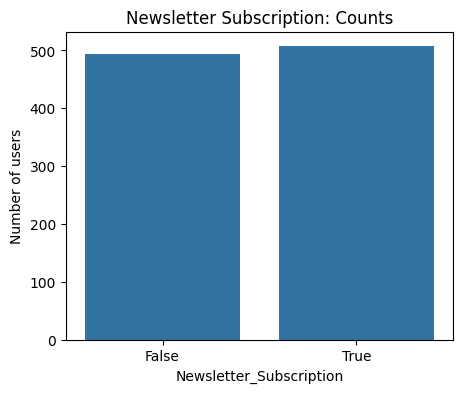

In [13]:
# ---------- Step 1: Check target (Newsletter_Subscription) ----------
target = "Newsletter_Subscription"

# show counts and proportions
print("Counts:")
print(df[target].value_counts())
print("\nProportions:")
print(df[target].value_counts(normalize=True))

# quick plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x=target, data=df)
plt.title("Newsletter Subscription: Counts")
plt.xlabel(target)
plt.ylabel("Number of users")
plt.show()


In [14]:
#we are takiing "Newsletter_Subscription" as ouptput feature 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ---------- Step 2: Preprocessing ----------

# Drop ID columns (not useful for prediction)
df_clean = df.drop(["User_ID", "Unnamed: 0"], axis=1)

# Separate features (X) and target (y)
X = df_clean.drop("Newsletter_Subscription", axis=1)
y = df_clean["Newsletter_Subscription"]

# One-hot encode categorical variables (convert text → numbers)
X = pd.get_dummies(X, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape of training data:", X_train.shape)
print("Shape of test data:", X_test.shape)


Shape of training data: (800, 19)
Shape of test data: (200, 19)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------- Step 3: Train Logistic Regression ----------
model = LogisticRegression(max_iter=1000)  # increase max_iter to ensure convergence
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Logistic Regression is very simple, and maybe your dataset has nonlinear patterns it can’t capture well.
#Features may need better selection/engineering.

Accuracy: 0.425

Classification Report:
              precision    recall  f1-score   support

       False       0.40      0.32      0.36        99
        True       0.44      0.52      0.48       101

    accuracy                           0.42       200
   macro avg       0.42      0.42      0.42       200
weighted avg       0.42      0.42      0.42       200


Confusion Matrix:
[[32 67]
 [48 53]]


In [18]:
#Try a Stronger Model — Random Forest

from sklearn.ensemble import RandomForestClassifier

# Step 4: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.505

Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.48      0.49        99
        True       0.51      0.52      0.52       101

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200


Confusion Matrix:
[[48 51]
 [48 53]]


In [19]:
#let’s try Support Vector Machine (SVM).
#Imagine plotting your data points on a graph.
#SVM tries to draw the best line (or hyperplane) that separates the two classes (“True” vs “False”).
#It does this by maximizing the margin (the gap between classes).
#If points overlap (not perfectly separable), SVM can use a kernel trick to bend the space and separate them better.

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize the model (with some common parameters)
svm_model = SVC(kernel='linear', random_state=42)

# 2. Train the model
svm_model.fit(X_train, y_train)

# 3. Predictions
y_pred_svm = svm_model.predict(X_test)

# 4. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Accuracy: 0.44

Classification Report:
              precision    recall  f1-score   support

       False       0.41      0.28      0.33        99
        True       0.46      0.59      0.52       101

    accuracy                           0.44       200
   macro avg       0.43      0.44      0.43       200
weighted avg       0.43      0.44      0.43       200


Confusion Matrix:
[[28 71]
 [41 60]]


In [20]:
#Next Step → Try RBF Kernel
#RBF lets SVM draw curvy, flexible boundaries instead of just straight lines.

svm_rbf = SVC(kernel='rbf', random_state=42)

svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))


Accuracy: 0.47

Classification Report:
              precision    recall  f1-score   support

       False       0.46      0.38      0.42        99
        True       0.48      0.55      0.51       101

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200


Confusion Matrix:
[[38 61]
 [45 56]]


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Define parameter grid for RBF Kernel
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': [0.01, 0.1, 1, 10],  # Kernel coefficient
    'kernel': ['rbf']
}

# Step 2: Grid search with 5-fold cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Step 3: Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Step 4: Train SVM with best hyperparameters
svm_rbf_best = grid_search.best_estimator_
y_pred_rbf = svm_rbf_best.predict(X_test)

# Step 5: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.47

Classification Report:
              precision    recall  f1-score   support

       False       0.46      0.39      0.42        99
        True       0.48      0.54      0.51       101

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200


Confusion Matrix:
[[39 60]
 [46 55]]


In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define parameter grid for RBF Kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf'],
    'class_weight': ['balanced']  # helps if classes are imbalanced
}

# Step 3: Grid search with 5-fold cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=15, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Step 4: Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Step 5: Train SVM with best hyperparameters
svm_rbf_best = grid_search.best_estimator_
y_pred_rbf = svm_rbf_best.predict(X_test_scaled)

# Step 6: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))


Fitting 15 folds for each of 16 candidates, totalling 240 fits
Best Hyperparameters: {'C': 100, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.46

Classification Report:
              precision    recall  f1-score   support

       False       0.46      0.46      0.46        99
        True       0.46      0.46      0.46       101

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.46      0.46       200


Confusion Matrix:
[[46 53]
 [55 46]]


In [25]:
# Step 1: Install pandas-profiling (if not installed)
# !pip install pandas-profiling

# Step 2: Import libraries
import pandas as pd
from pandas_profiling import ProfileReport

# Step 3: Load your dataset
# Replace 'ecommerce_data.csv' with your dataset file
df = pd.read_csv('Ecommerce recommender using Support Vector Machine.csv')

# Step 4: Create the pandas profiling report
profile = ProfileReport(df, title="E-commerce Dataset EDA Report", explorative=True)

# Step 5: Save the report as an HTML file
profile.to_file("ecommerce_eda_report.html")

# Step 6 (Optional): If using Jupyter, display inline
# profile.to_widgets()


C:\Users\HP\AppData\Local\Temp\ipykernel_45372\3944218600.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00, 11.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]